In [3]:
# General Imports
import geopandas as gpd #pip install geopandas descartes
import pandas as pd #pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import numpy as np
import os

# from multiprocessing import Pool
# from dbfread import DBF #pip install dbfread
# from simpledbf import Dbf5 #pip install simpledbf

In [6]:
# Read 'linhatrem' lines shape file
def read_shape(shapefile):
    # Read the shapefile pointed in the spec.json
    print("Reading shapefile: ", shapefile)
    zones_shape = gpd.read_file(shapefile, encoding='latin')
    print("Current projection: ", zones_shape.crs)
    
    # Projection used as Coordinate System, compatible with Cubu lat/lon format
    projection = {'proj': 'longlat', 'ellps': 'WGS84', 'no_defs': True}

    # Change projection for long/lat if different and save to new file
    zones_shape_modified = None
    if(zones_shape.crs != projection):
        print("Changing projection.\n")
        zones_shape_modified = zones_shape.to_crs(projection)
        print("Written to ", os.path.dirname(shapefile) + '_modified\n\n')
        zones_shape_modified.to_file(os.path.dirname(shapefile) + '_modified')

    return zones_shape, zones_shape_modified

Reading shapefile:  ../maps/SubCentral-AreaCentral/SubCentral-AreaCentral.shp
Current projection:  epsg:22523
Reading shapefile:  ../maps/SubCentral-AreaNoroeste/SubCentral-AreaNoroeste.shp
Current projection:  epsg:22523
Reading shapefile:  ../maps/SubCentral-AreaNorte/SubCentral-AreaNorte.shp
Current projection:  epsg:22523
Reading shapefile:  ../maps/SubCentral-AreaNordeste/SubCentral-AreaNordeste.shp
Current projection:  epsg:22523
Reading shapefile:  ../maps/SubCentral-AreaLeste/SubCentral-AreaLeste.shp
Current projection:  epsg:22523
Reading shapefile:  ../maps/SubCentral-AreaSudeste/SubCentral-AreaSudeste.shp
Current projection:  epsg:22523
Reading shapefile:  ../maps/SubCentral-AreaSul/SubCentral-AreaSul.shp
Current projection:  epsg:22523
Reading shapefile:  ../maps/SubCentral-AreaSudoeste/SubCentral-AreaSudoeste.shp
Current projection:  epsg:22523
Reading shapefile:  ../maps/SubCentral-AreaOeste/SubCentral-AreaOeste.shp
Current projection:  epsg:22523


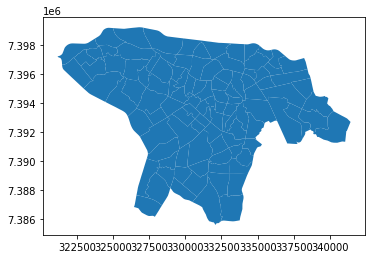

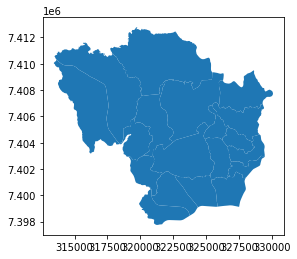

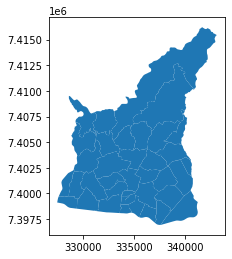

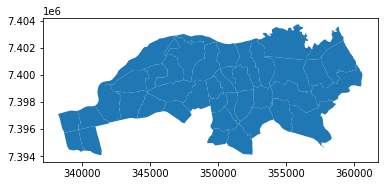

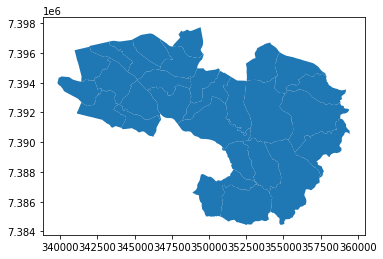

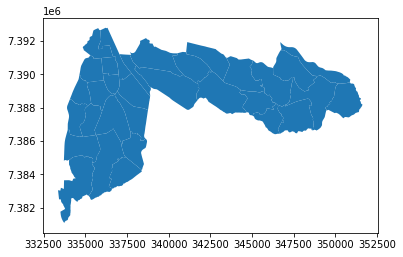

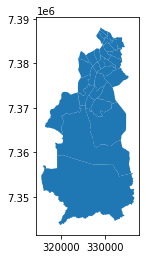

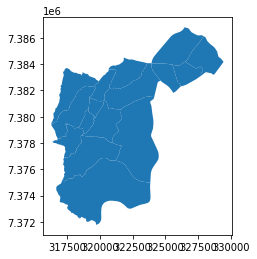

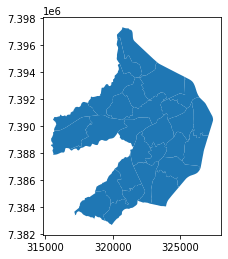

In [7]:
MAPS_DIR='../maps/'

areas = [
    'SubCentral-AreaCentral',
    'SubCentral-AreaNoroeste',
    'SubCentral-AreaNorte',
    'SubCentral-AreaNordeste',
    'SubCentral-AreaLeste',
    'SubCentral-AreaSudeste',
    'SubCentral-AreaSul',
    'SubCentral-AreaSudoeste',
    'SubCentral-AreaOeste' 
]

for area in areas:
    zone = read_shape(f'{MAPS_DIR}{area}/{area}.shp')
    zone.plot()